In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [3]:
class Net(nn.Module):
    def __init__(self, in_features: int, nodes_ratio: float):
        super(Net, self).__init__()
        num_nodes = math.floor(nodes_ratio*in_features)
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features, num_nodes),  # input layer
            nn.ReLU(),
            nn.Linear(num_nodes, num_nodes),    # hidden layer 1
            nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 2
#             nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 3
#             nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 4
#             nn.ReLU(),
#             nn.Linear(num_nodes, num_nodes),    # hidden layer 5
#             nn.ReLU(),
            nn.Linear(num_nodes, 1)             # output layer 5
        )

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        X = self.linear_relu_stack(X)
        return torch.sigmoid(X)

In [4]:
# kk = 0
# Kfolds = 5

# front_dir = '../data/split/kfold'

# X_train = np.loadtxt(front_dir + f'/X_train-{str(kk)}_kfold{str(Kfolds)}.csv', delimiter=',')
# X_test = np.loadtxt(front_dir + f'/X_test-{str(kk)}_kfold{str(Kfolds)}.csv', delimiter=',')
# y_train = pd.read_csv(front_dir + f'/y_train-{str(kk)}_kfold{str(Kfolds)}.csv', index_col=0)
# y_test = pd.read_csv(front_dir + f'/y_test-{str(kk)}_kfold{str(Kfolds)}.csv', index_col=0)

front_dir = '../data/split/standard'

X_train = np.loadtxt(front_dir + '/X_train.csv', delimiter=',')
X_test = np.loadtxt(front_dir + '/X_test.csv', delimiter=',')
y_train = pd.read_csv(front_dir + '/y_train.csv', index_col=0)
y_test = pd.read_csv(front_dir + '/y_test.csv', index_col=0)

y_train = y_train['class'].values
y_test = y_test['class'].values

print('---- X_train ----')
print(X_train, '\n')
print('---- X_test ----')
print(X_test, '\n')
print('---- y_train ----')
display(y_train)
print('---- y_test ----')
display(y_test)

---- X_train ----
[[ 1.       0.8413   0.61915 ... 10.5646  15.1611   3.154  ]
 [ 1.       0.85141  0.78231 ... 17.9862  19.32    16.7182 ]
 [ 1.       0.4168   0.81849 ... 10.2158  12.5514   4.5732 ]
 ...
 [ 1.       0.8194   0.66134 ...  4.6975   5.1289  16.1682 ]
 [ 0.       0.7992   0.56036 ... 15.6959  10.7006   4.1641 ]
 [ 1.       0.85127  0.69896 ...  4.3219   3.2261   6.0101 ]] 

---- X_test ----
[[ 1.       0.26053  0.6523  ... 25.4372  44.0381  19.5625 ]
 [ 1.       0.10348  0.62955 ...  8.231    4.2785  11.8537 ]
 [ 1.       0.74652  0.63445 ...  2.5856   2.7656  14.9227 ]
 ...
 [ 1.       0.82927  0.69312 ...  4.4932   6.7454  31.5223 ]
 [ 1.       0.82311  0.65177 ... 60.7794  49.6973  95.8868 ]
 [ 0.       0.84634  0.56678 ... 26.5051  32.8832   3.4474 ]] 

---- y_train ----


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

---- y_test ----


array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [5]:
%%time

num_epochs = 200
nodes_ratio = 3
learning_rate = 1e-1
lambda1 = 1e-3


net = Net(in_features=X_train.shape[1], nodes_ratio=nodes_ratio)
print(net)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

mean_tracker = []
loss_tracker = []

print("\n- learning...")
for epoch in range(num_epochs):
    # forward propagation
    y_hat = net(torch.tensor(X_train).float())
    
    # calculate loss (without l1 regularization)
    loss = criterion(torch.tensor(y_train).reshape(len(y_train), 1).float(), y_hat)
    
    # add in the l1 regularization
    l1_reg = 0
    for param in net.parameters():
        l1_reg += torch.norm(param, 1)
    loss += lambda1*l1_reg
    
    # initialize gradients to zero
    optimizer.zero_grad()
    
    # run backprop to calculate gradients
    loss.backward()
    
    # update the model parameters
    optimizer.step()
    
#     print(f"--v-- epoch {epoch} --v--")
#     print("mean(y_hat) =", y_hat.detach().numpy().mean())
#     print("Loss =", loss)
    mean_tracker.append(y_hat.detach().numpy().mean())
    loss_tracker.append(loss.item())
print("  ...done\n")

Net(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=584, out_features=1752, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1752, out_features=1752, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1752, out_features=1, bias=True)
  )
)

- learning...
  ...done

CPU times: user 1min, sys: 2.34 s, total: 1min 2s
Wall time: 33 s


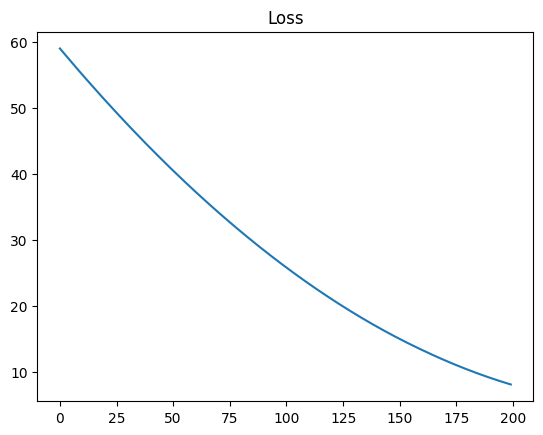

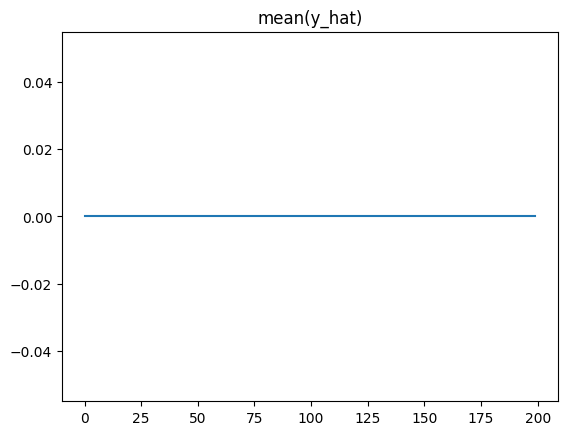

In [6]:
plt.figure()
plt.plot(np.arange(len(loss_tracker)), loss_tracker)
plt.title("Loss")
plt.show()
plt.close()

plt.figure()
plt.plot(np.arange(len(mean_tracker)), mean_tracker)
plt.title("mean(y_hat)")
plt.show()
plt.close()

In [ ]:
# F- I-- N---